In [90]:
import pandas as pd
import matplotlib as plt
from sklearn import tree
from graphviz import Source
import seaborn as sns
import numpy as np

In [3]:
from IPython.display import SVG
from IPython.display import display 
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50%; !important;}</style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv('D:\statistics\Titanic.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
x = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1 )
y = titanic_data.Survived

In [8]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
x = x.fillna({'Age': x.Age.median()})

In [10]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
x = pd.get_dummies(x)

In [12]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 100, min_samples_leaf = 10)

In [14]:
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

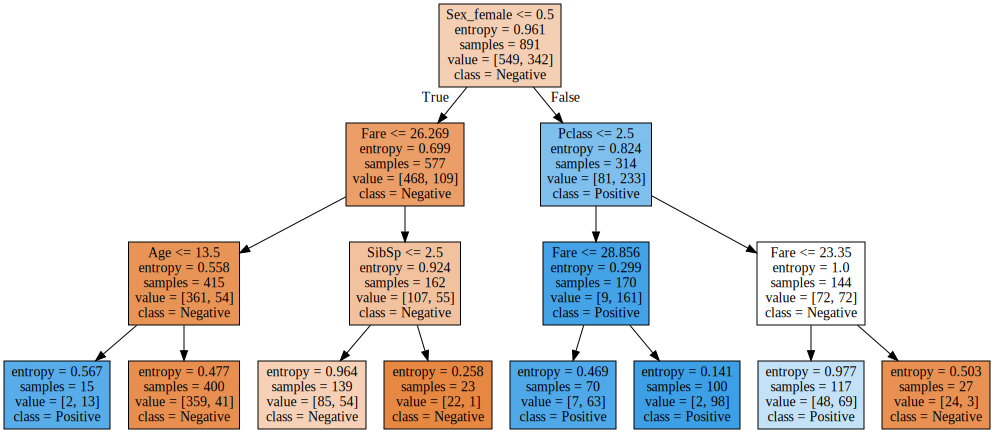

In [15]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(x),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [17]:
x.describe

<bound method NDFrame.describe of      Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0         3  22.0      1      0   7.2500           0         1           0   
1         1  38.0      1      0  71.2833           1         0           1   
2         3  26.0      0      0   7.9250           1         0           0   
3         1  35.0      1      0  53.1000           1         0           0   
4         3  35.0      0      0   8.0500           0         1           0   
..      ...   ...    ...    ...      ...         ...       ...         ...   
886       2  27.0      0      0  13.0000           0         1           0   
887       1  19.0      0      0  30.0000           1         0           0   
888       3  28.0      1      2  23.4500           1         0           0   
889       1  26.0      0      0  30.0000           0         1           1   
890       3  32.0      0      0   7.7500           0         1           0   

     Embarked_Q  Embarked_S  

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [19]:
x_train.shape

(596, 10)

In [20]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [21]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0


In [22]:
x_test.shape

(295, 10)

In [23]:
clf.score(x,y)

0.8226711560044894

In [24]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
clf.score(x_test,y_test)

0.7762711864406779

In [26]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [27]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
clf.score(x_train,y_train)

0.8338926174496645

In [29]:
clf.score(x_test,y_test)

0.823728813559322

# Обучение, переобучение, недообучение и кросвалидация

In [30]:
max_depth_values = range(1,100)

In [31]:
scores_data = pd.DataFrame()

In [32]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score],
                                   'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [33]:
temp_score_data

,max_depth,train_score,test_score,cross_val_score
0,99,0.979866,0.779661,0.7718


In [34]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.803664


In [35]:
scores_data.describe

<bound method NDFrame.describe of     max_depth  train_score  test_score  cross_val_score
0           1     0.781879    0.796610         0.781857
0           2     0.805369    0.776271         0.768553
0           3     0.823826    0.820339         0.788678
0           4     0.833893    0.823729         0.783580
0           5     0.840604    0.810169         0.803664
..        ...          ...         ...              ...
0          95     0.979866    0.769492         0.776800
0          96     0.979866    0.772881         0.770091
0          97     0.979866    0.776271         0.768410
0          98     0.979866    0.786441         0.771829
0          99     0.979866    0.779661         0.771800

[99 rows x 4 columns]>

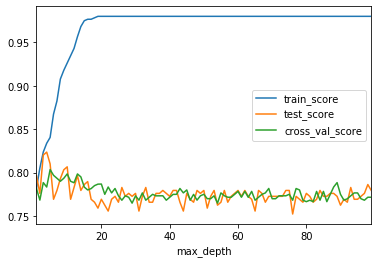

In [36]:
scores_data.plot(x = 'max_depth', y = ['train_score', 'test_score','cross_val_score'])

Переделаем датафрейм: одна переменная скор, а трейн и тест в качестве ключа

In [37]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score','test_score','cross_val_score'],
        var_name='set_type', value_name='score')


In [38]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


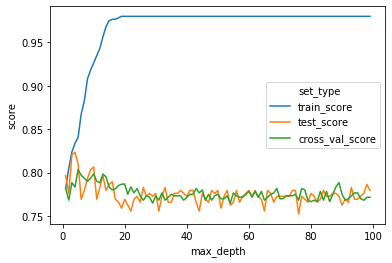

In [39]:
sns.lineplot(x = 'max_depth', y = 'score' , data = scores_data_long, hue = 'set_type')

# CROSS VALIDATION

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [42]:
cross_val_score(clf, x_train, y_train, cv = 5)

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [43]:
cross_val_score(clf, x_train, y_train, cv = 5).mean()

0.7835799743626264

In [44]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.803664
203,6,cross_val_score,0.797054
204,7,cross_val_score,0.793622
205,8,cross_val_score,0.790190
206,9,cross_val_score,0.793608
207,10,cross_val_score,0.798636


In [45]:
scores_data.head(20)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.803664
0,6,0.867450,0.769492,0.797054
0,7,0.882550,0.779661,0.793622
0,8,0.907718,0.793220,0.790190
0,9,0.917785,0.803390,0.793608
0,10,0.926174,0.806780,0.798636


In [46]:
scores_data.cross_val_score.max()

0.8036642453591606

In [47]:
scores_data.query('cross_val_score == "0.8036637705929829"') # we have found max_depth

,max_depth,train_score,test_score,cross_val_score


In [48]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy' , max_depth = 14) # here we are fitting our model with correct max_depth

# НАХОЖДЕНИЕ ОПТИМАЛЬНЫХ ПАРАМЕТРОВ МОДЕЛИ BY GRID_SEARCH_CV

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
parametrs = {'criterion': ['gini','entropy'], 'max_depth' : range(1,30)}

In [52]:
grid_search_cv_clf = GridSearchCV(clf,parametrs, cv = 5)

In [53]:
grid_search_cv_clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [54]:
a = grid_search_cv_clf.fit(x_train,y_train)

In [55]:
a.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [56]:
best_clf = grid_search_cv_clf.best_estimator_ # лучшие показатели модели

In [57]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
best_clf.score(x_test,y_test)

0.8067796610169492

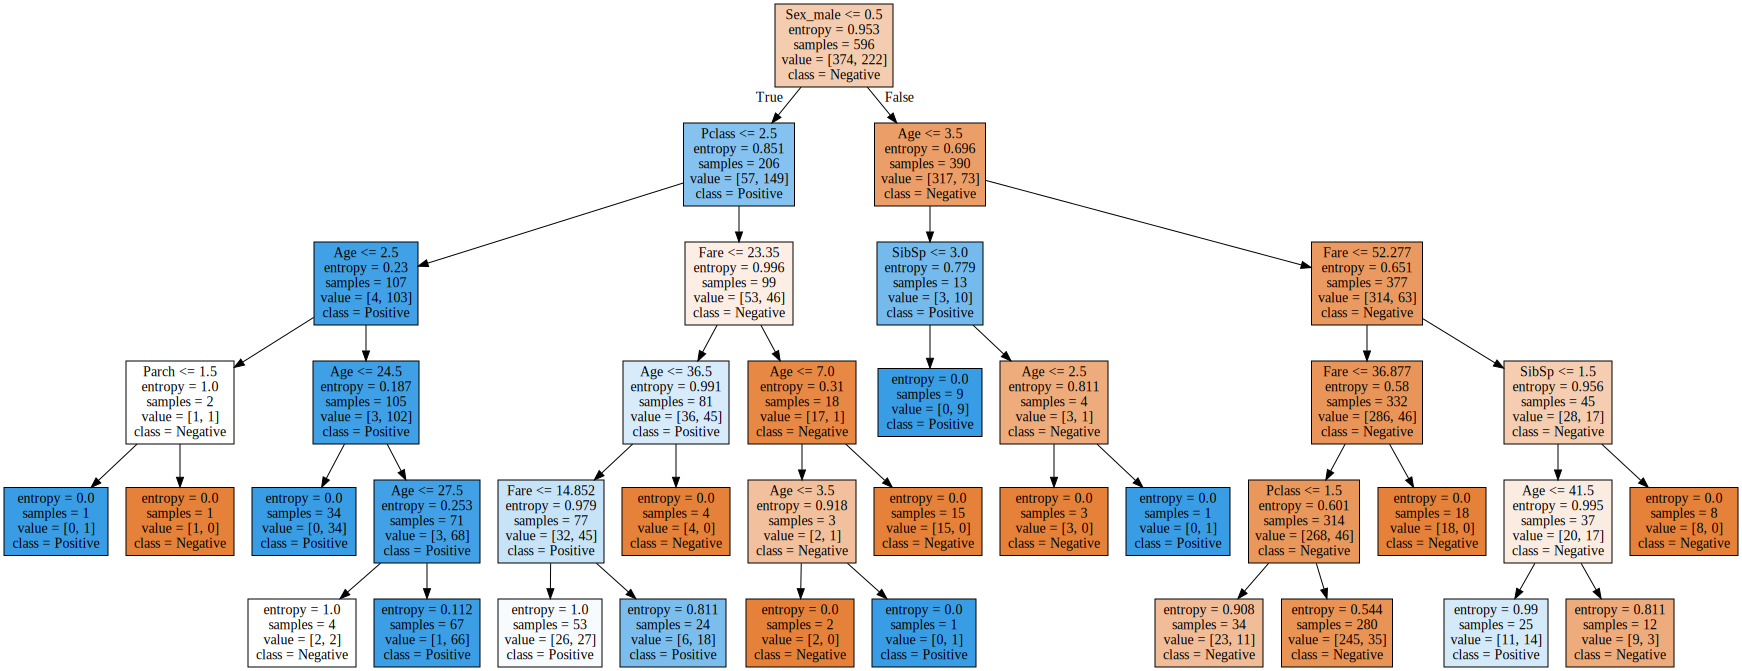

In [59]:
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                    feature_names=list(x),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [61]:
y_pred = best_clf.predict(x_test)

In [62]:
precision_score(y_test, y_pred)

0.7889908256880734

In [63]:
recall_score(y_test, y_pred)

0.7166666666666667

In [64]:
f1_score(y_test, y_pred)

0.7510917030567685

In [65]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [66]:
y_predicted_prob = best_clf.predict_proba(x_test)

In [67]:
y_predicted_prob

array([[0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.49056604, 0.50943396],
       [0.5       , 0.5       ],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [0.49056604, 0.50943396],
       [0.        , 1.        ],
       [0.44      , 0.56      ],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.67647059, 0.32352941],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.67647059, 0.32352941],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.49056604, 0.50943396],
       [0.

In [68]:
y_predicted_prob[:,1]

array([0.125     , 0.125     , 0.125     , 1.        , 0.50943396,
       0.5       , 0.50943396, 0.125     , 0.50943396, 1.        ,
       0.56      , 0.125     , 0.        , 0.125     , 0.125     ,
       1.        , 0.25      , 0.50943396, 0.125     , 0.        ,
       0.125     , 0.32352941, 0.50943396, 0.125     , 0.125     ,
       0.125     , 0.32352941, 0.125     , 0.125     , 0.50943396,
       0.125     , 0.50943396, 0.32352941, 0.50943396, 0.125     ,
       0.125     , 0.32352941, 0.50943396, 0.98507463, 0.125     ,
       0.        , 0.125     , 0.125     , 0.125     , 0.        ,
       0.125     , 0.125     , 0.125     , 0.125     , 0.25      ,
       0.75      , 0.98507463, 0.125     , 0.56      , 0.125     ,
       1.        , 0.125     , 0.98507463, 0.98507463, 0.50943396,
       0.125     , 1.        , 0.98507463, 0.32352941, 0.125     ,
       0.98507463, 0.56      , 0.125     , 0.125     , 0.98507463,
       0.5       , 1.        , 0.32352941, 0.98507463, 0.125  

In [69]:
pd.Series(y_predicted_prob[:,1])

0      0.125000
1      0.125000
2      0.125000
3      1.000000
4      0.509434
         ...   
290    0.125000
291    0.125000
292    0.750000
293    0.750000
294    0.125000
Length: 295, dtype: float64

In [70]:
pd.Series(y_predicted_prob[:,1]).unique()

array([0.125     , 1.        , 0.50943396, 0.5       , 0.56      ,
       0.        , 0.25      , 0.32352941, 0.98507463, 0.75      ])

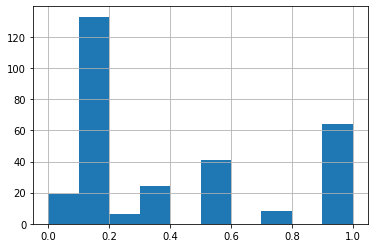

In [71]:
pd.Series(y_predicted_prob[:,1]).hist()

In [72]:
y_pred = np.where(y_predicted_prob[:,1] > 0.3,1,0)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0])

In [73]:
precision_score(y_test,y_pred)

0.7372262773722628

In [74]:
recall_score(y_test, y_pred)

0.8416666666666667

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf_rf = RandomForestClassifier()

In [77]:
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
parametrs = {'n_estimators':[10,20,30], 'max_depth':[2,5,7,10]}

In [79]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv = 5)

In [80]:
grid_search_cv_clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [81]:
grid_search_cv_clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [82]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [83]:
best_clf = grid_search_cv_clf.best_estimator_

In [84]:
best_clf.score(x_test,y_test)

0.8067796610169492

In [85]:
best_clf.feature_importances_

array([0.1310155 , 0.13716157, 0.05137858, 0.03940736, 0.21696908,
       0.178645  , 0.172693  , 0.03802365, 0.01185244, 0.02285383])

In [86]:
feature_importances = best_clf.feature_importances_

In [87]:
feature_importances_df = pd.DataFrame({'feautures':list(x_train),'feature_importances':feature_importances})

In [88]:
feature_importances_df.sort_values('feature_importances', ascending = False)

,feautures,feature_importances
4,Fare,0.216969
5,Sex_female,0.178645
6,Sex_male,0.172693
1,Age,0.137162
0,Pclass,0.131015
2,SibSp,0.051379
3,Parch,0.039407
7,Embarked_C,0.038024
9,Embarked_S,0.022854
8,Embarked_Q,0.011852


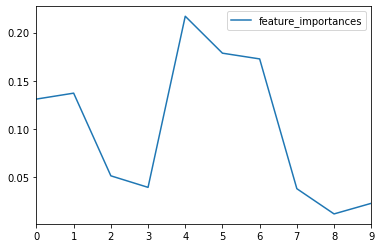

In [89]:
feature_importances_df.plot()